### Libraries

In [1]:
import sys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
print('Python version: '+sys.version)
print('Pandas version: '+pd.__version__)
print('Seaborn version: '+sns.__version__)
print('Scikit Learn version: '+sklearn.__version__)

Python version: 3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version: 0.18.1
Seaborn version: 0.7.0
Scikit Learn version: 0.17.1


### Load DataSet

In [4]:
iris = pd.read_csv('data/Iris.csv')

In [5]:
iris_original = iris

In [6]:
iris_original.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris = iris.iloc[:,1:]

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
iris['Species'] = iris['Species'].astype('category')

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null category
dtypes: category(1), float64(4)
memory usage: 4.9 KB


In [12]:
values = ['count','min','max','mean','std']
iris.groupby(by='Species').agg(values)

SepalLengthCm                            SepalWidthCm       \
                        count  min  max   mean       std        count  min   
Species                                                                      
Iris-setosa                50  4.3  5.8  5.006  0.352490           50  2.3   
Iris-versicolor            50  4.9  7.0  5.936  0.516171           50  2.0   
Iris-virginica             50  4.9  7.9  6.588  0.635880           50  2.2   

                                      PetalLengthCm                   \
                 max   mean       std         count  min  max   mean   
Species                                                                
Iris-setosa      4.4  3.418  0.381024            50  1.0  1.9  1.464   
Iris-versicolor  3.4  2.770  0.313798            50  3.0  5.1  4.260   
Iris-virginica   3.8  2.974  0.322497            50  4.5  6.9  5.552   

                          PetalWidthCm                             
                      std        count  min  max   mean       std  
Species                                                            
Iris-setosa      0.173511           50  0.1  0.6  0.244  0.107210  
Iris-versicolor  0.469911           50  1.0  1.8  1.326  0.197753  
Iris-virginica   0.551895           50  1.4  2.5  2.026  0.274650

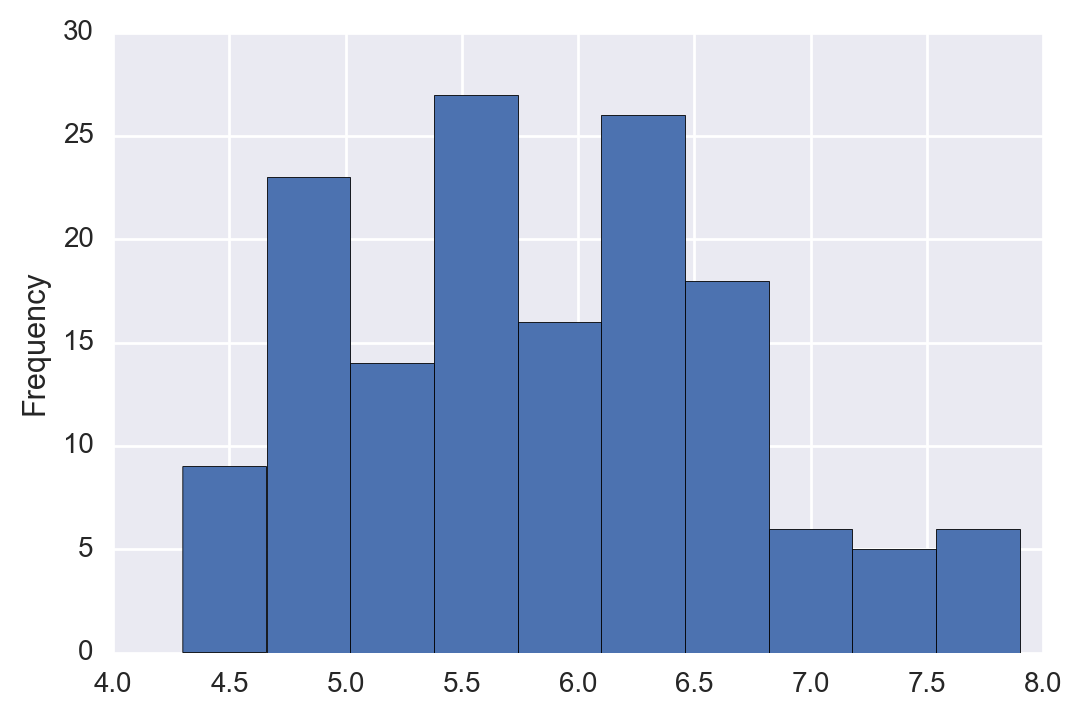

In [13]:
iris['SepalLengthCm'].plot.hist()

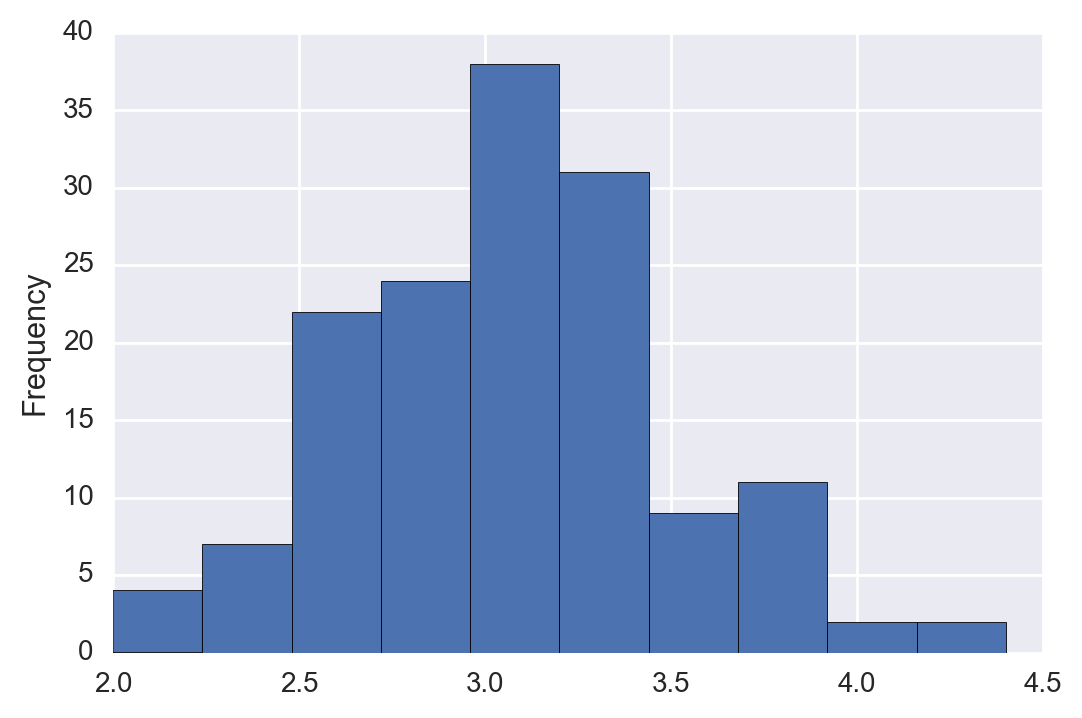

In [14]:
iris['SepalWidthCm'].plot.hist()

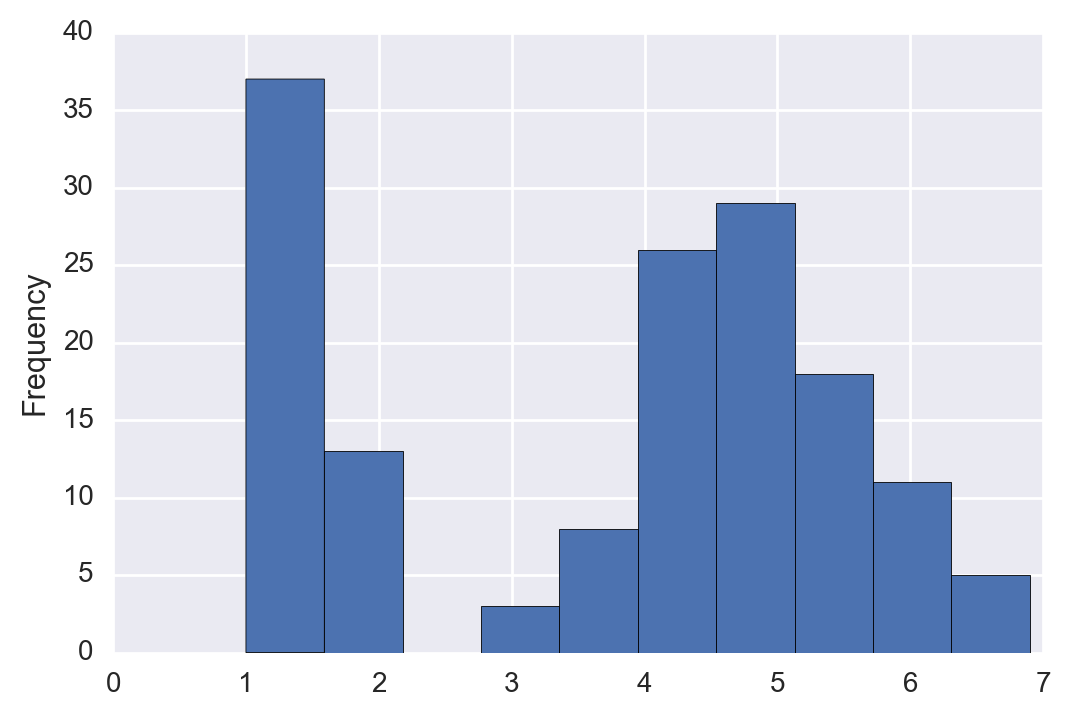

In [15]:
iris['PetalLengthCm'].plot.hist()

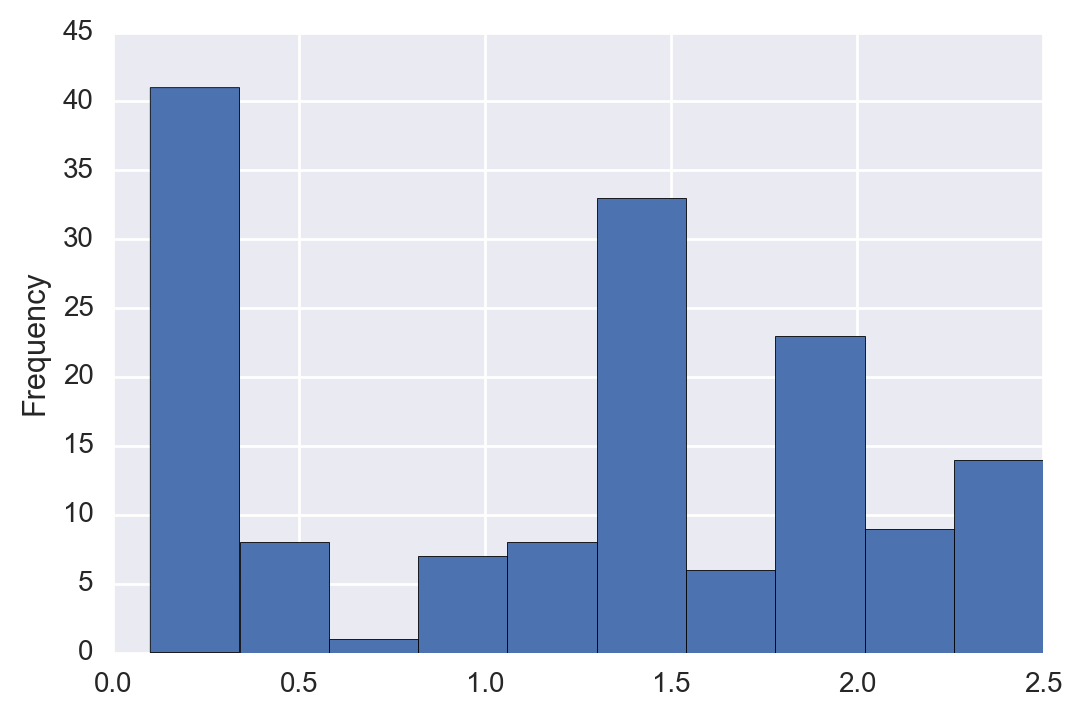

In [16]:
iris['PetalWidthCm'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b01e8d0>,
      dtype=object)

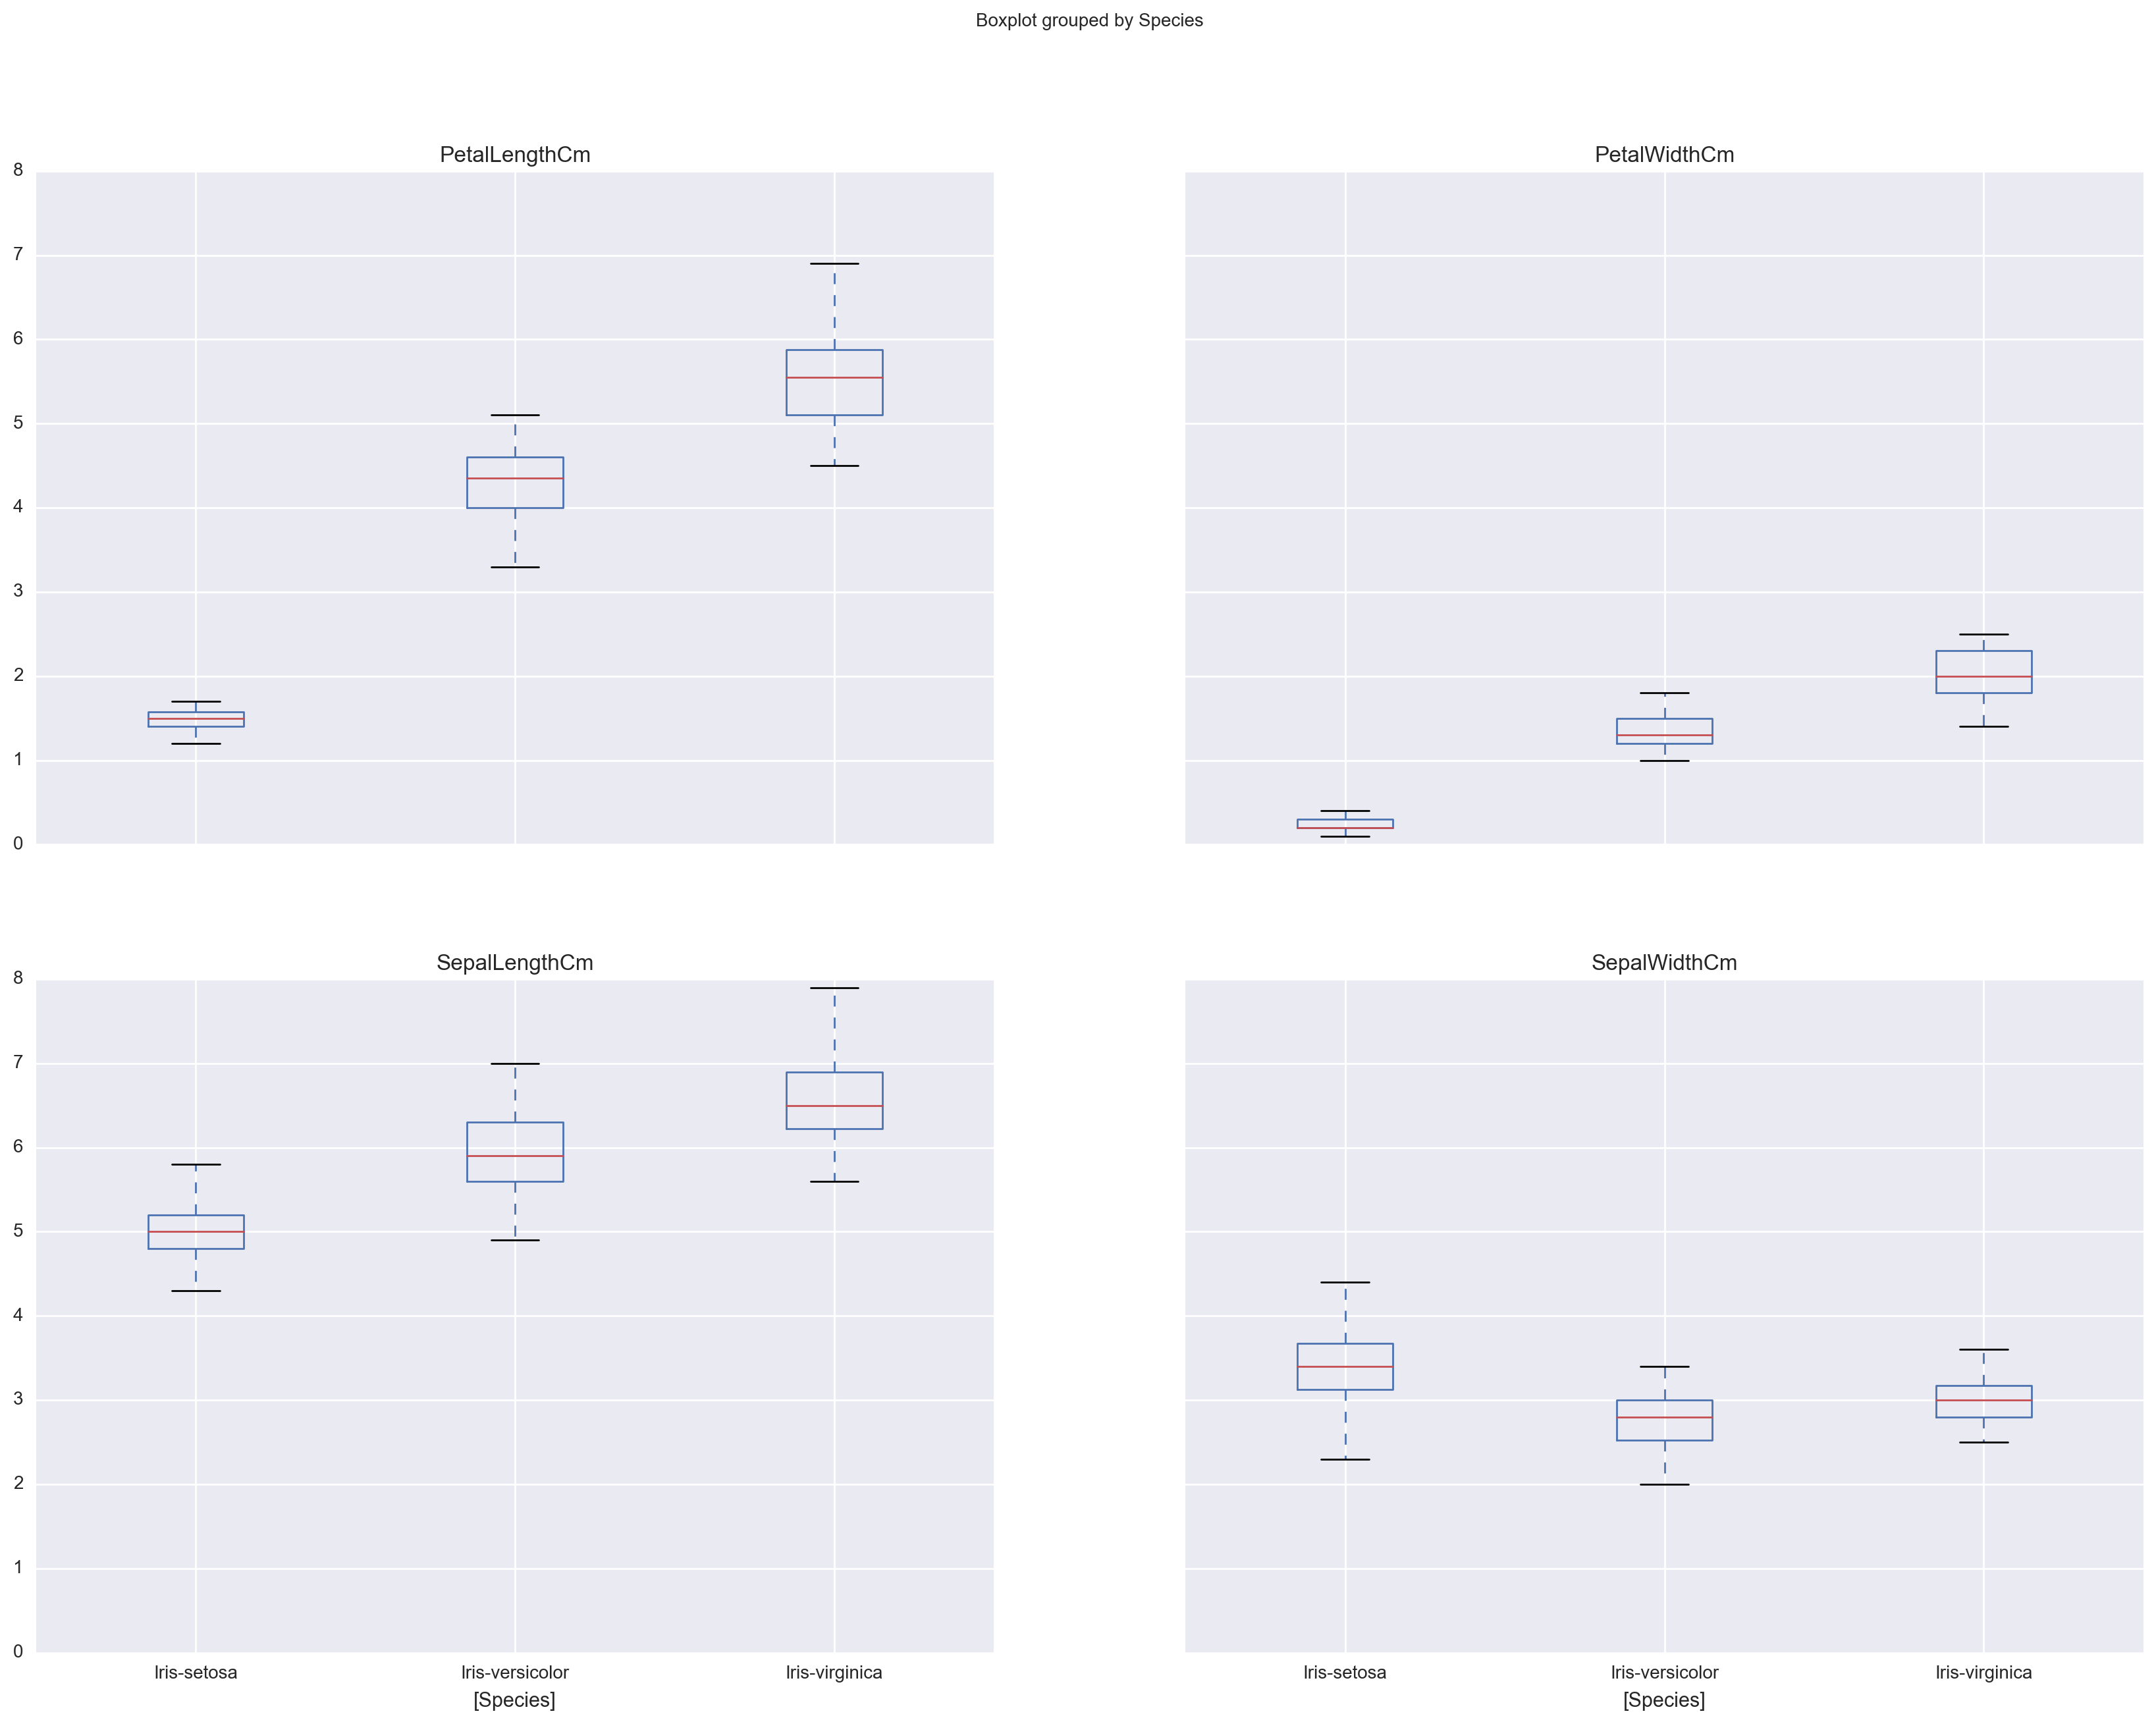

In [17]:
iris.boxplot(by='Species',figsize=(20,15))

### Multidimensional Plots

In [18]:
from pandas import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e4c10b8>,
      dtype=object)

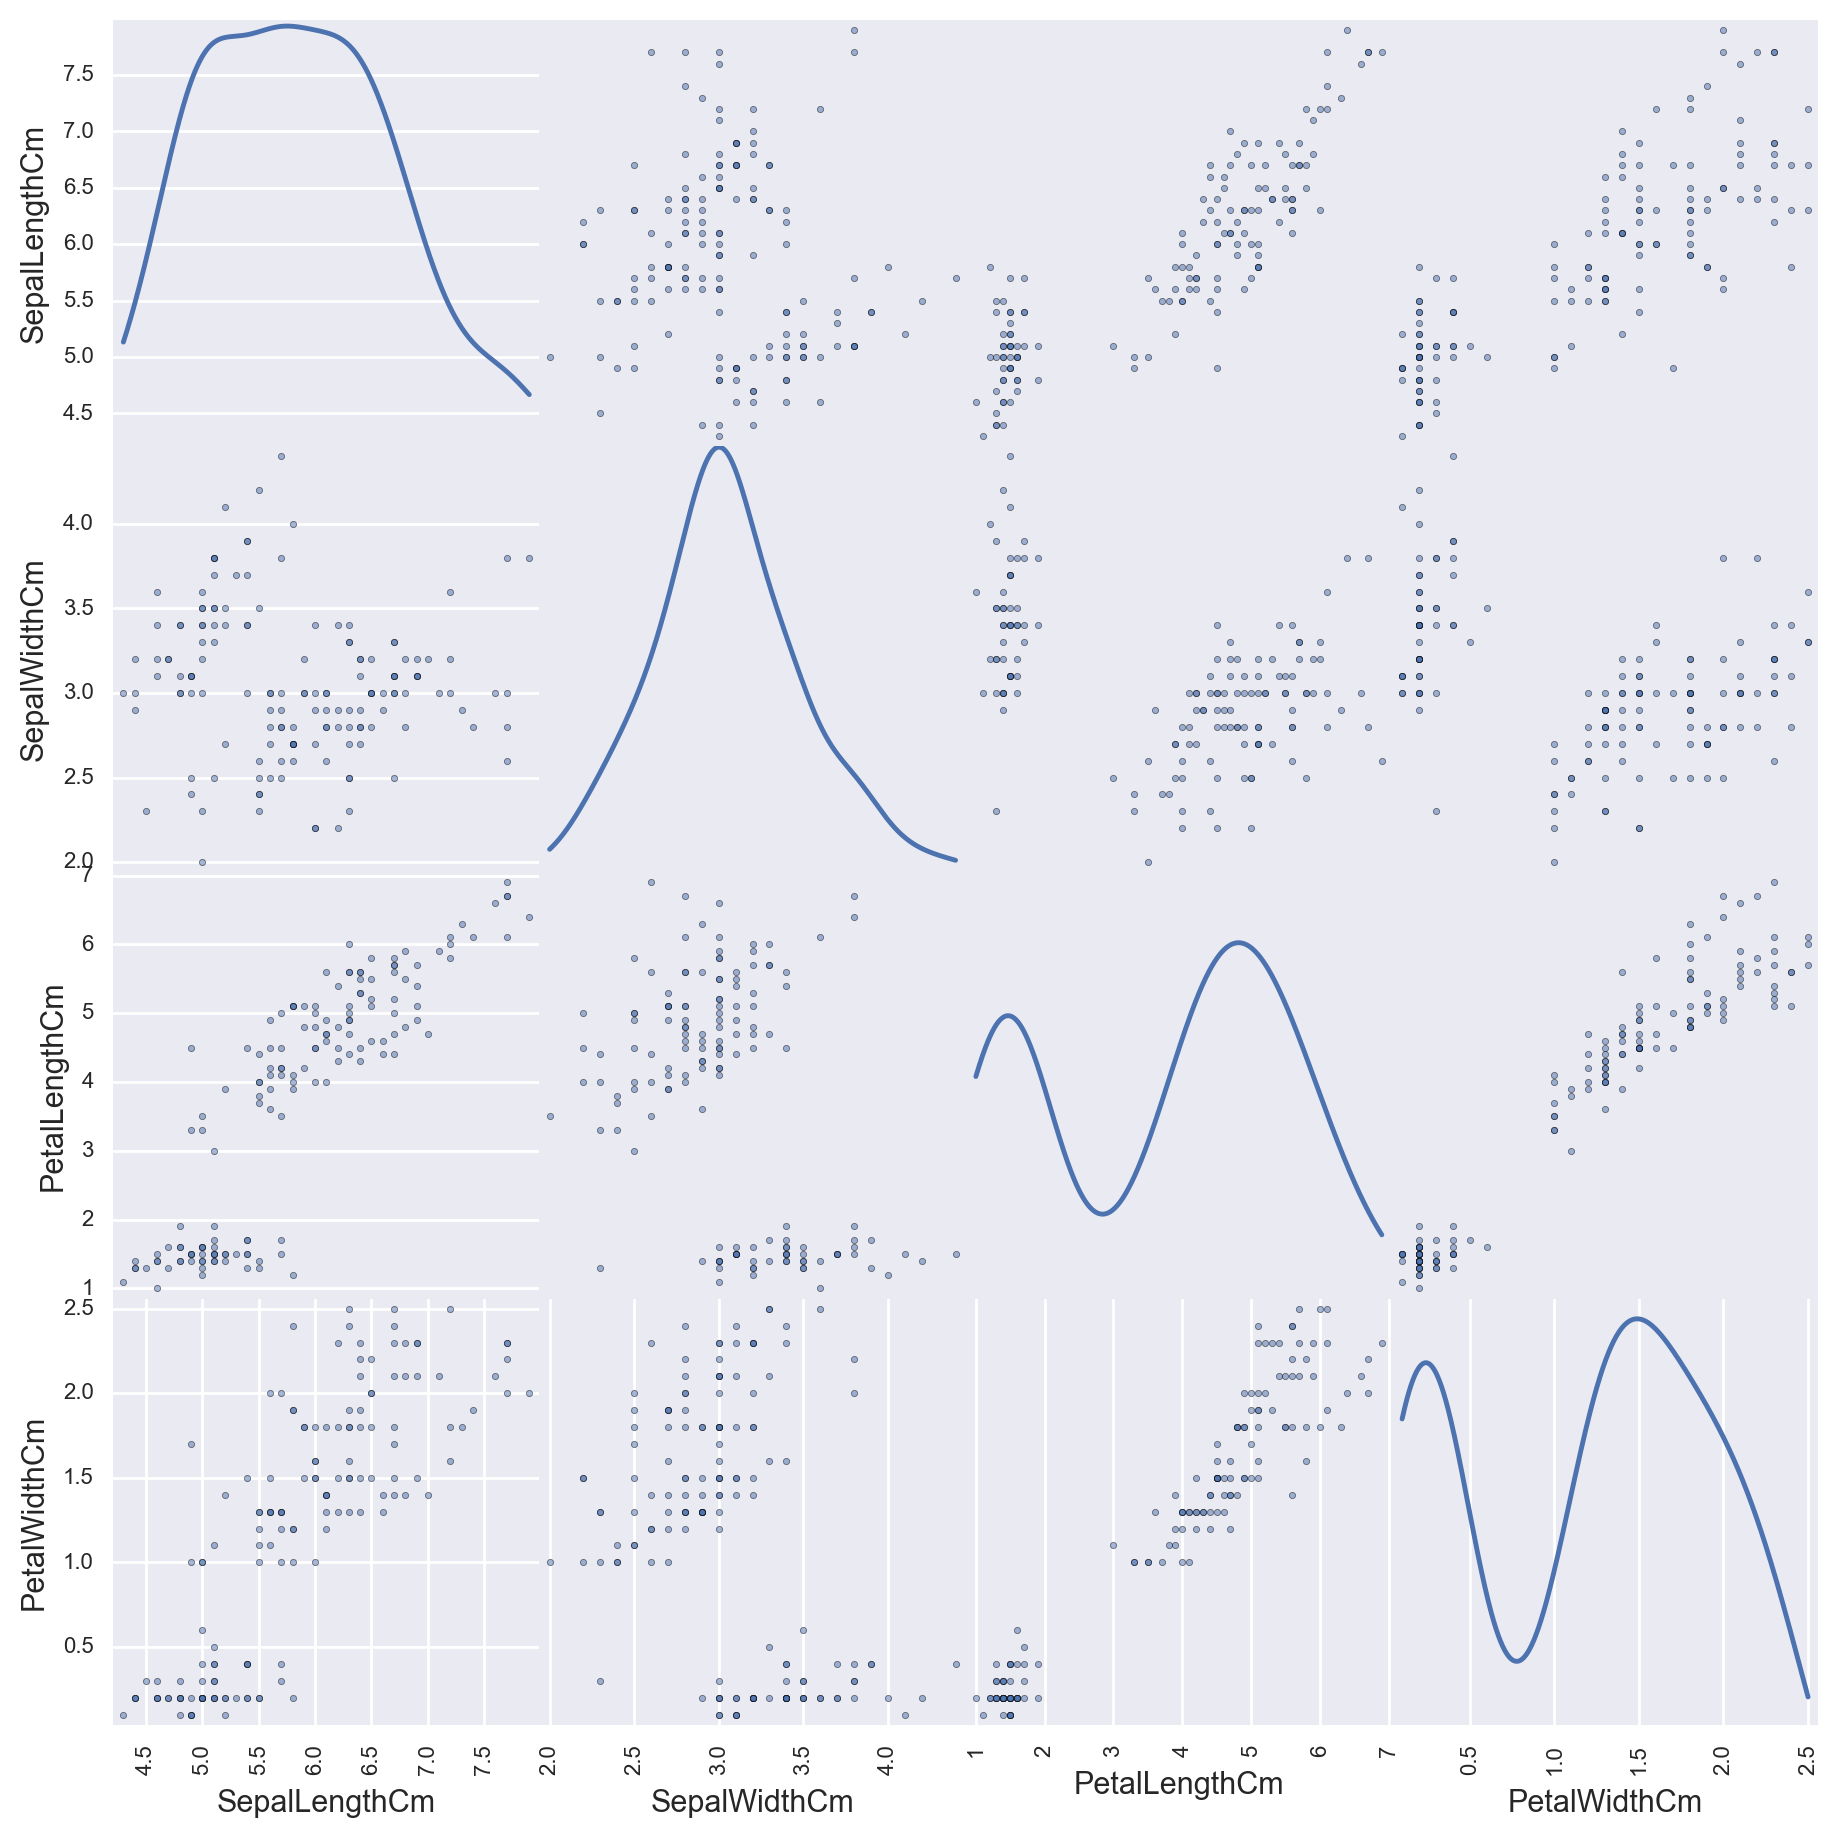

In [19]:
scatter_matrix(iris, figsize = (11,11), diagonal = 'kde')

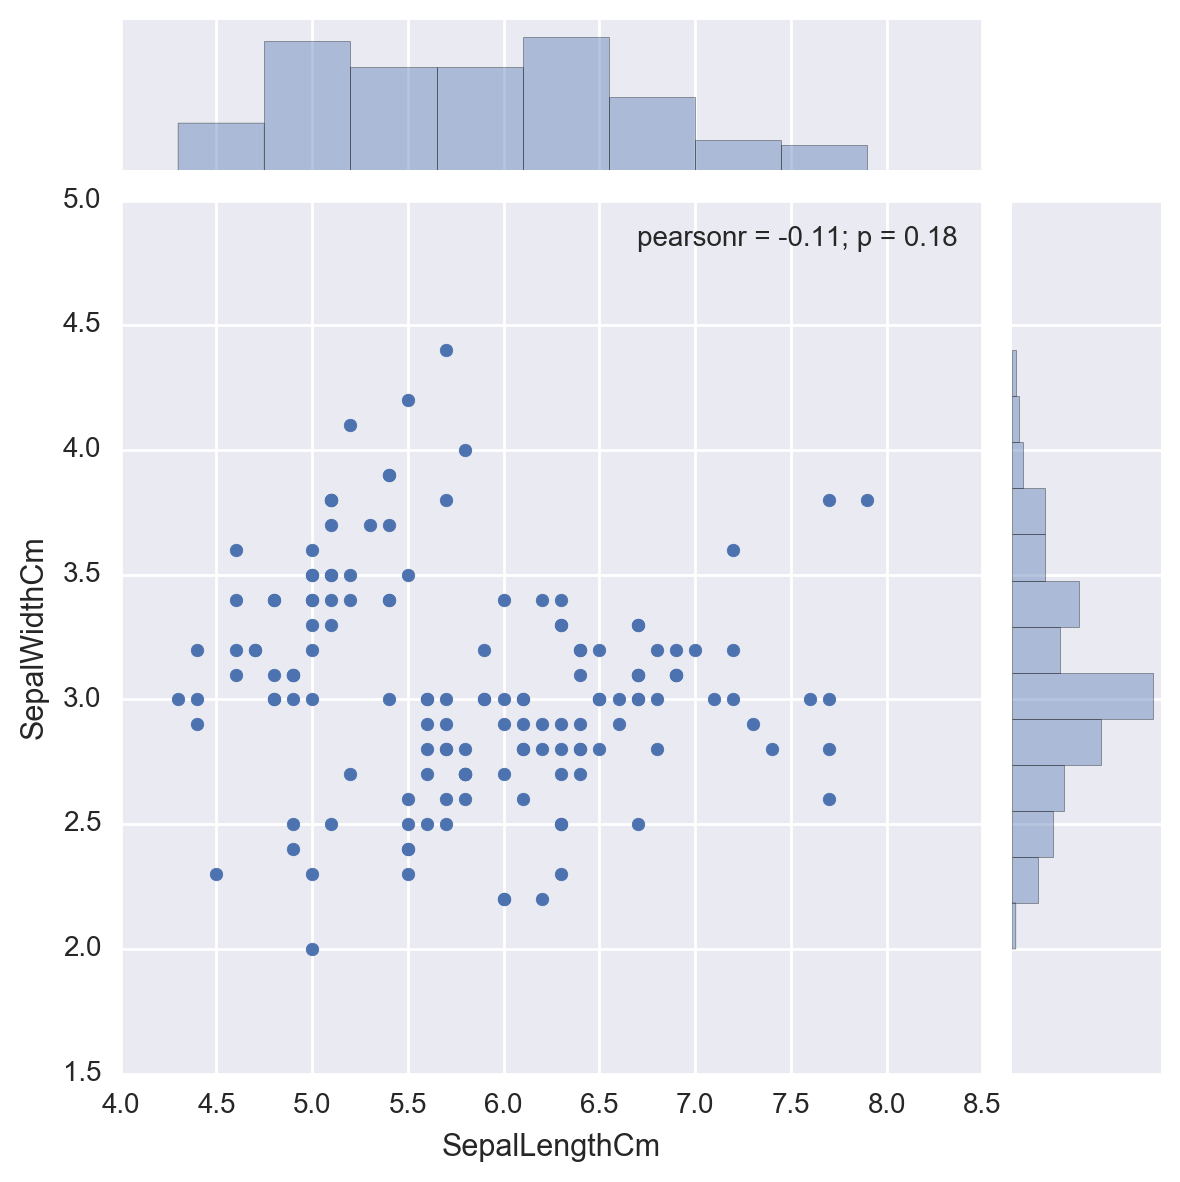

In [20]:
sns.jointplot(data=iris,
              x='SepalLengthCm',
              y='SepalWidthCm',
              kind='scatter')

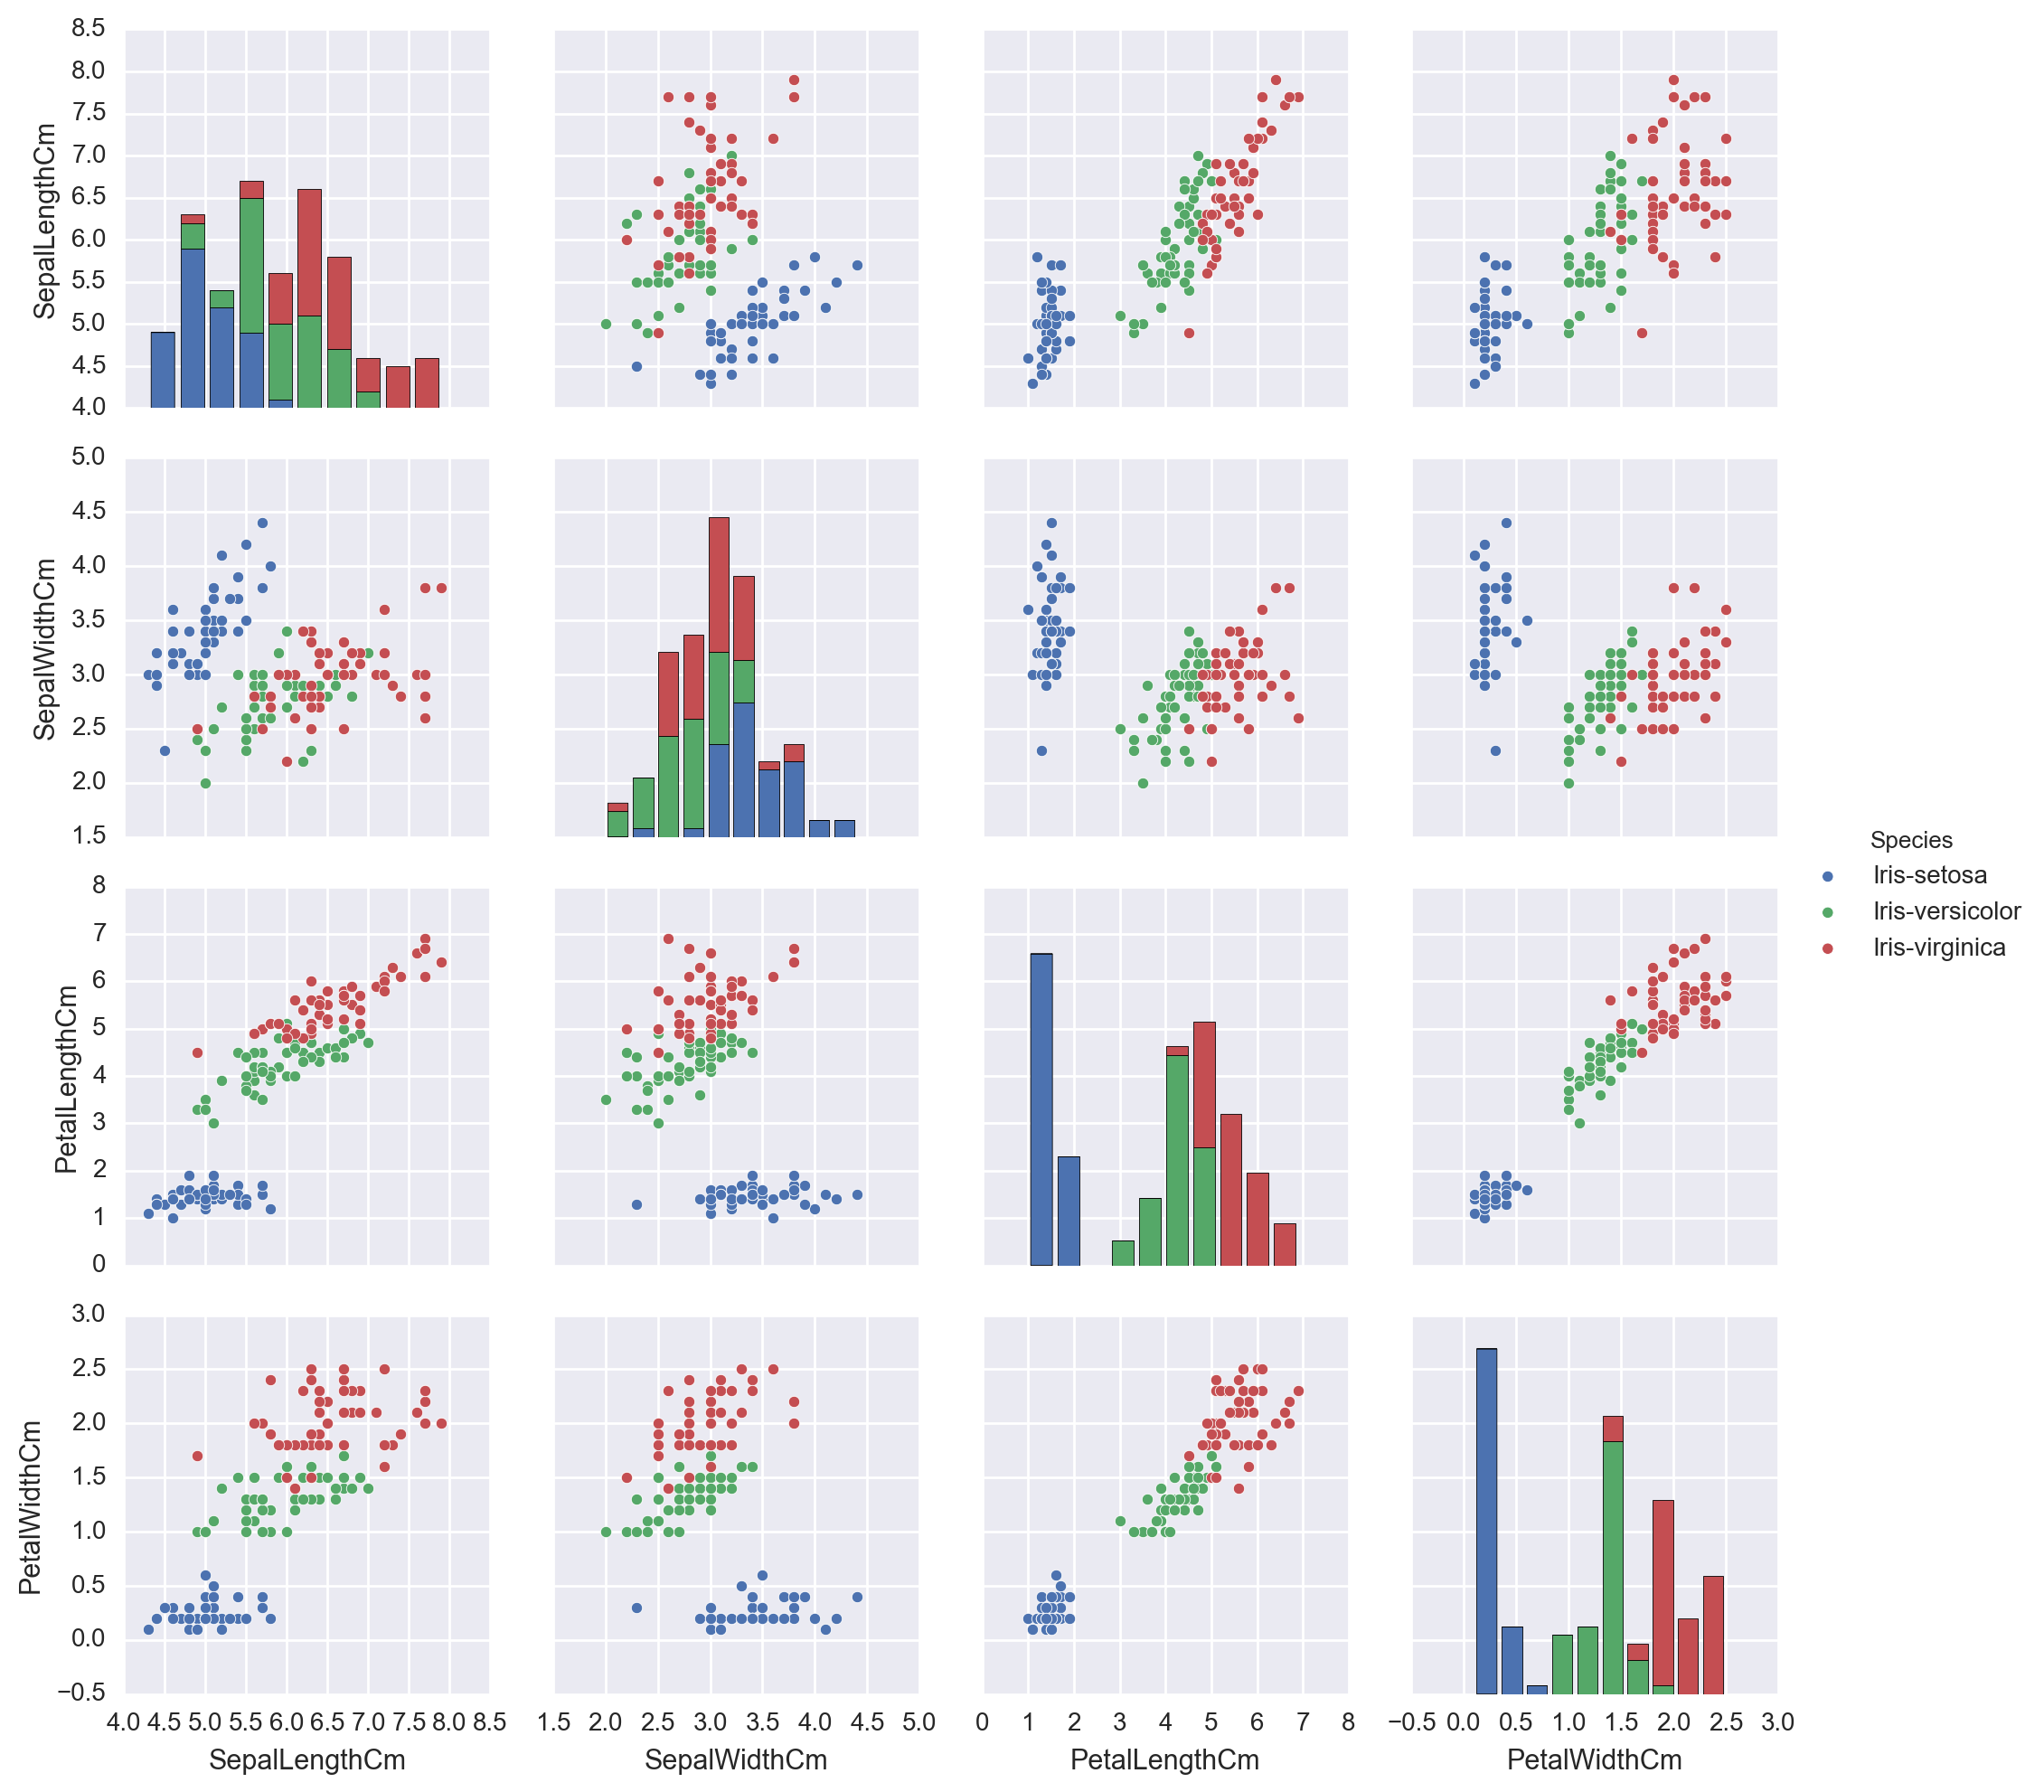

In [21]:
# pairwise relationship
sns.pairplot(iris,
             hue='Species')

In [22]:
iris['above_sepal_width_mean'] = iris['SepalWidthCm'] > iris['SepalWidthCm'].mean()


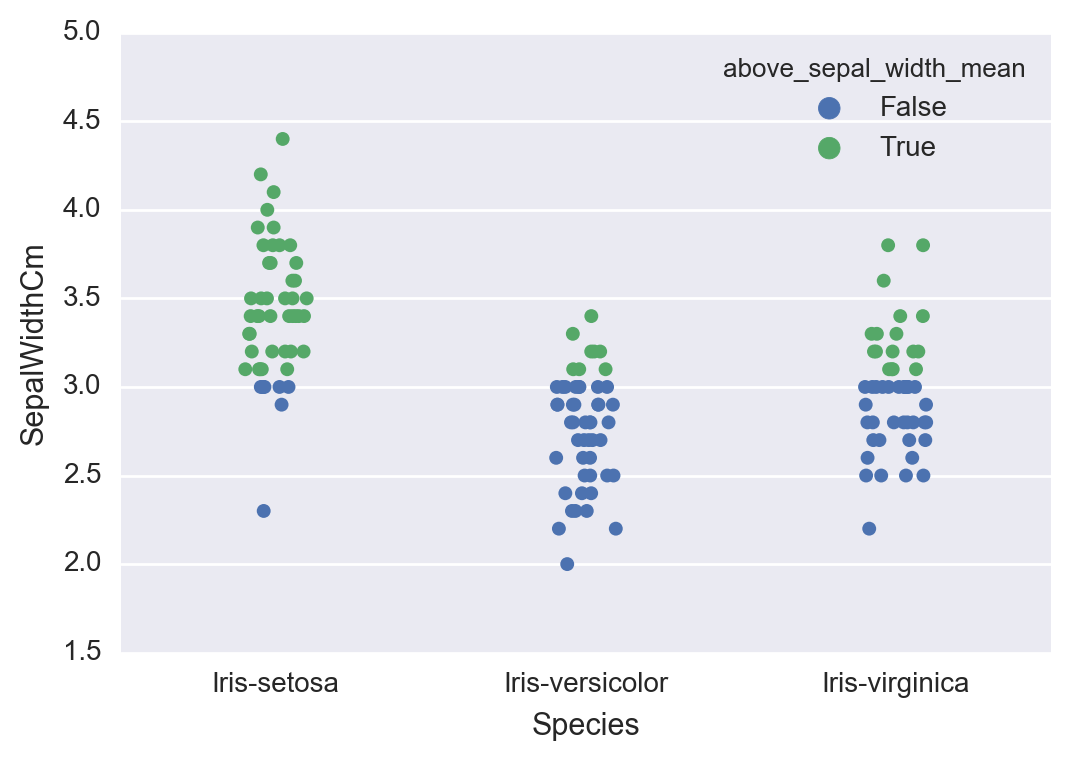

In [23]:
sns.stripplot(data=iris,
              x='Species',
              y='SepalWidthCm',
              hue='above_sepal_width_mean',
              jitter=True)

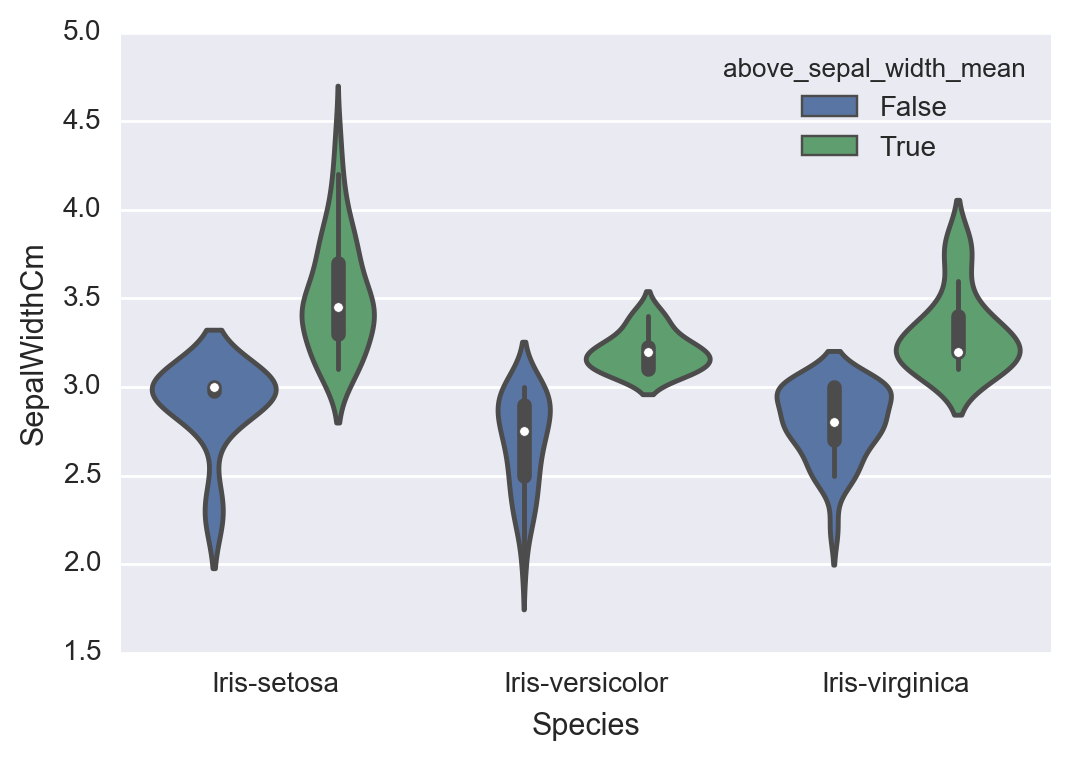

In [24]:
sns.violinplot(data=iris,
               x='Species',
               y='SepalWidthCm',
               hue='above_sepal_width_mean',
               inner='box')

In [25]:
from sklearn import preprocessing
# convert to sklearn format, grab first 2 columns
X = np.array(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])[:, :2]

# convert strings to categorical
le = preprocessing.LabelEncoder()
le.fit(iris['Species'])
y = le.transform(iris['Species'])

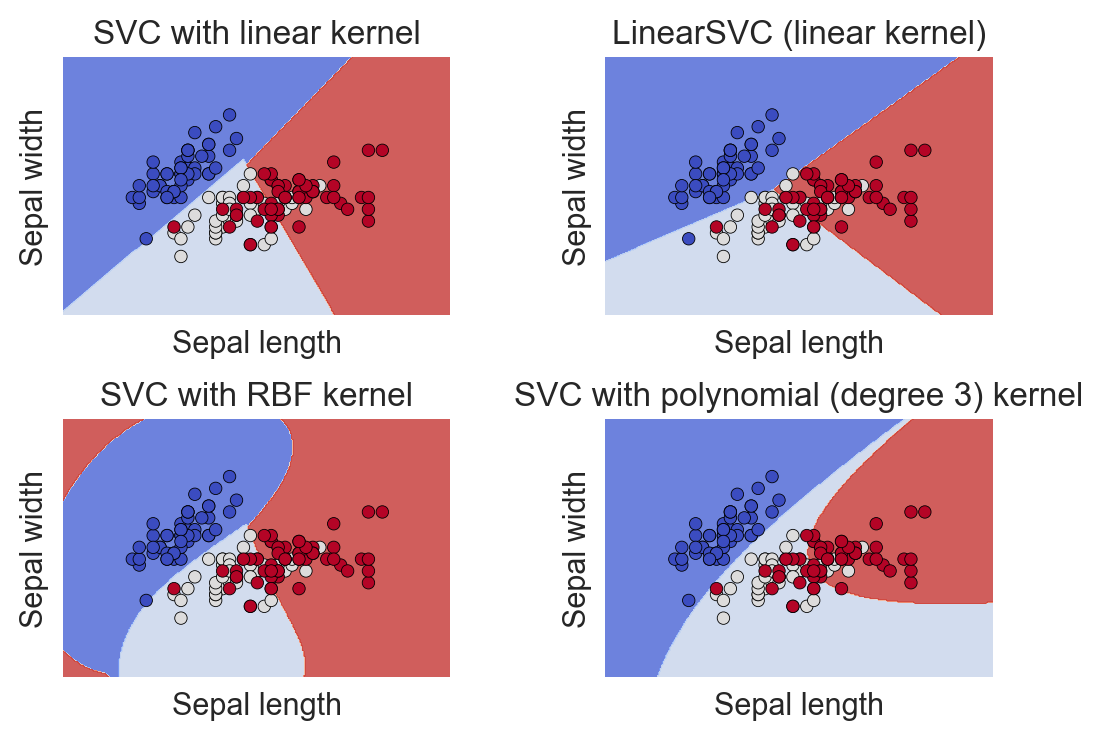

In [26]:

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()